### Part 1: Stable Diffusion Inference 🎇

In [1]:
!nvidia-smi

Wed Apr 26 13:34:20 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P0    47W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [7]:
!cd /content/
!git clone https://github.com/huggingface/diffusers.git
!pip install ./diffusers
!pip install -U -r /content/diffusers/examples/text_to_image/requirements.txt

fatal: destination path 'diffusers' already exists and is not an empty directory.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Processing ./diffusers
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for diffusers: filename=diffusers-0.16.0-py3-none-any.whl size=934833 sha256=c6e1d0ae5299de5d890718d1c063e8882d898a44b07157bd83c2d0a59cdfd3e8
  Stored in directory: /tmp/pip-ephem-wheel-cache-wqdrn46r/wheels/bd/1c/ea/a9c409b587aa6f3abca1bf1ce8eb592b2b541e5f26f5a4f44b
Successfully built diffusers
  Attempting uninstall: diffusers
    Found existing installation: diffusers 0.16.0
    Uninstalling diffusers-0.16.0:
      Successfully uninstalled diffusers-0.16.0


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Stable Diffusion V1 Inference Testing

Let's test out version 1.2 of the original model without any finetuning.

In [8]:
from diffusers import StableDiffusionPipeline
import torch# Stable Diffusion V1
from PIL import Image

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

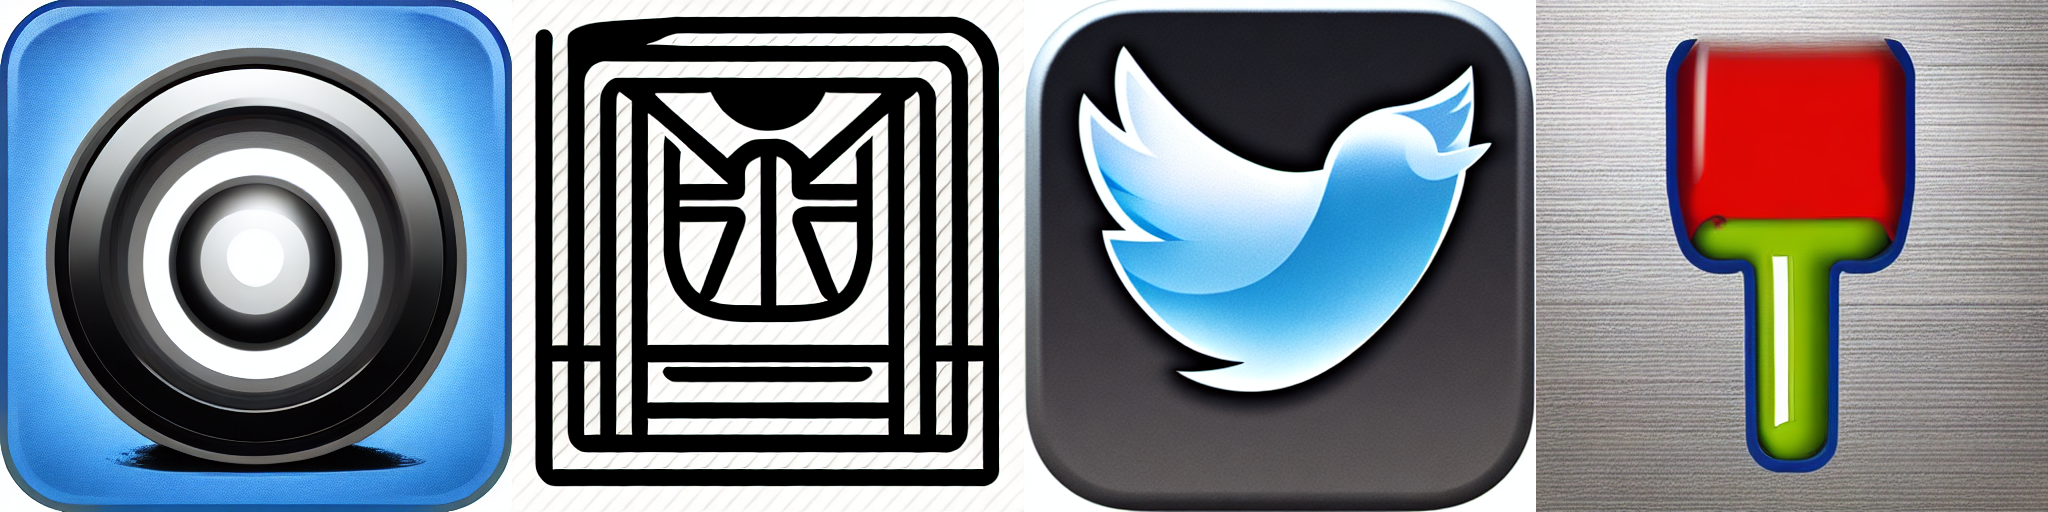

In [9]:
# Stable Diffusion V1
model_path = "CompVis/stable-diffusion-v1-2"
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16)
pipe.to("cuda")

# Run inference using ChatGPT prompts to acquire 4 image panels
image1 = pipe(prompt="flashlight iOS icon").images[0]
image1.save("aiconOS_panel_1.png")

image2 = pipe(prompt="clothing ecommerce business iOS icon").images[0]
image2.save("aiconOS_2.png")

image3 = pipe(prompt="twitter iOS icon").images[0]
image3.save("aiconOS_panel_3.png")

image4 = pipe(prompt="Mike and Ike iOS icon").images[0]
image4.save("aiconOS_panel_4.png")

# Image grid helper function from HuggingFace
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

all_images = [image1, image2, image3, image4]
grid = image_grid(all_images, rows=1, cols=4)
grid

## Stable Diffusion V2 Inference Testing

Let's test out version 2.1 of the original model without any finetuning.

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

  0%|          | 0/50 [00:00<?, ?it/s]

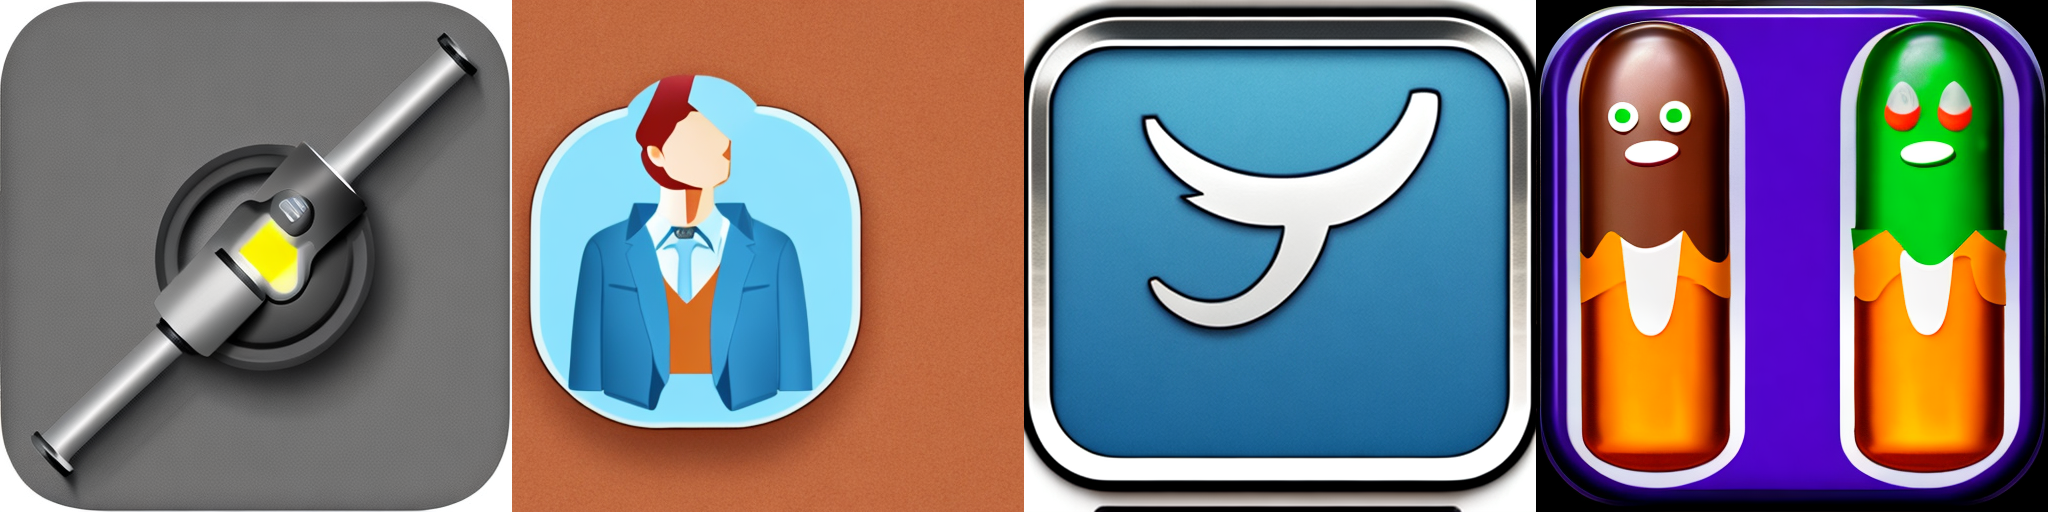

In [6]:
# Stable Diffusion V2
model_path = "stabilityai/stable-diffusion-2-1-base"
pipe = StableDiffusionPipeline.from_pretrained(model_path, torch_dtype=torch.float16)
pipe.to("cuda")

# Run inference using ChatGPT prompts to acquire 4 image panels
image1 = pipe(prompt="flashlight iOS icon").images[0]
image1.save("aiconOS_panel_1.png")

image2 = pipe(prompt="clothing ecommerce business iOS icon").images[0]
image2.save("aiconOS_2.png")

image3 = pipe(prompt="twitter iOS icon").images[0]
image3.save("aiconOS_panel_3.png")

image4 = pipe(prompt="Mike and Ike iOS icon").images[0]
image4.save("aiconOS_panel_4.png")

# Image grid helper function from HuggingFace
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows*cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols*w, rows*h))
    grid_w, grid_h = grid.size
    
    for i, img in enumerate(imgs):
        grid.paste(img, box=(i%cols*w, i//cols*h))
    return grid

all_images = [image1, image2, image3, image4]
grid = image_grid(all_images, rows=1, cols=4)
grid
